In [235]:
def graphBoundary(X,y, w, phi=None, xlim=(-1,1),ylim=(-1,1),b=100,ax=None,space=None):
    if ax is None:
        fig, ax = plt.subplots()
    #Generate Background points for coloring the boundary
    p = np.linspace(xlim[0],xlim[1],b)
    A = []
    for i in p:
        for j in p:
            A.append([i,j])
    background_points = np.matrix(np.insert(np.matrix(A),0,1,axis=1))
    print(background_points.shape)
    if phi is not None:
        yhat = phi(background_points)*w
    else:
        yhat = background_points*w
    
    blux, bluy, redx,redy = [],[],[],[]
    
    #classify background points
    
    for p in range(len(background_points)):
        h = yhat[p,0]
        i = background_points[p,1]
        j = background_points[p,2]
        
        if h > 0:
            blux.append(i)
            bluy.append(j)
        else:
            redx.append(i)
            redy.append(j)
            
            
    #plot boundary
    ax.scatter(blux,bluy,marker='s',color='#4a9df2')               
    ax.scatter(redx,redy,marker='s',color='#f68f9e') 
    
    blux, bluy, redx,redy = [],[],[],[]
    
    #Plot Data Points
    N = len(X)
    for i in range(N):
        if y[i,0] > 0:
            blux.append(X[i,1])
            bluy.append(X[i,2])
            
        else:
            redx.append(X[i,1])
            redy.append(X[i,2])
            
    ax.scatter(blux,bluy,marker="o",s=75,
                     edgecolor="black",color='blue')
    ax.scatter(redx,redy,marker="o",s=75,
                     edgecolor="black",color='red')
    
    ax.axis('scaled')
    
    #return fig

In [18]:
def graph(X,y,w):
    N = len(X)
    for i in range(N):
        if y[i] > 0:
            plt.plot(X[i,1],X[i,2],marker="o",markersize=10,
                     markeredgecolor="black",markerfacecolor='blue')
        else:
            plt.plot(X[i,1],X[i,2],marker="o",markersize=10,
                     markeredgecolor="black",markerfacecolor='red')


            
    plt.show()

# Homework 1

In [1]:
import numpy as np
import pandas as pd

from sklearn import preprocessing, model_selection, metrics

import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

## Task 1: 
<u> Describe a machine learning problem that you would like to solve using Logistic Regression. Clearly state why Logistic regression is the best choice for solving this problem. </u>
    
Hit Probability. Hit Probability (HP) referes to the chance the a ball put in play results in a hit. This is a binary classification task, when the ball is hit there are two possible outcomes: hit or not a hit (out/error/fielders choice). We will ignore foul balls, unless they are caught for an out. Logistic regression intuitively seems like a good choice for solving the problem because it is a binary classification task, and there is a linear relationship between velocity, location, and likelihood of a hit.

## Task 2

In [276]:
data = pd.read_csv("citi_field.csv")

In [277]:
#Keep only necessary attributes
data = data[['events','description','type','outs_when_up',
      'hc_x','hc_y','hit_distance_sc','launch_speed','launch_angle',
      'estimated_ba_using_speedangle','estimated_woba_using_speedangle','woba_value']]
#Drop instances where ball wasn't hit into play
data = data[data['events'].isin(['home_run','single'])]

In [278]:
hits = ['home_run']
outs = ['field_out']

In [279]:
data.loc[:,'y'] = data['events'].isin(hits)

In [280]:
features = data[['launch_speed','launch_angle']]

data = data[~features.isna().any(axis=1)]
features = data[['launch_speed','launch_angle']]
features['bias'] = 1
features = features[['launch_speed','launch_angle']]
features['launch_angle'] = features['launch_angle']**2

<ipython-input-280-977fcffadc8f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['bias'] = 1


In [281]:
X_data = np.matrix(features.to_numpy())

In [282]:
y=np.matrix(np.where(data['y'],-1,1)).T

In [283]:
X_data.shape, y.shape

((416, 2), (416, 1))

In [284]:
x_train, x_test, y_train,y_test = model_selection.train_test_split(X_data, y)

In [285]:
scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

In [286]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

C:\Users\William\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\William\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\William\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.mat

In [287]:
x_train = np.matrix(np.insert(x_train,0,1,axis=1))
x_test  = np.matrix(np.insert(x_test,0,1,axis=1))

## Task 3

In [246]:
def predict(x, w):
    return x@w
def classify(x,w):
    yhat = x@w
    return np.matrix(np.where(yhat > .5, 1, -1 ))

Cost of weights $w$ at point $n$: $ln(1+e^{-y_nw^Tx_n})$

In [19]:
def gradient(x,y,wt):
    N = len(x)
    d = len(wt)
    total = np.matrix(np.zeros(d))
    for n in range(0,N):
        #yn = y[n]
        num = (y[n]*x[n]) #1*d
        exp = (y[n]*wt.T*x[n].T)[0,0]
        denom = (1+ np.math.e**exp )
        div = num/denom
        total += div
    return (-total/N).T

In [309]:
def logistic_regression(X,Y,w0,T,eta):
    wt = w0
    for t in tqdm(range(1,T+1)):
        gt = gradient(X,Y,wt)
        vt = -gt
        wt = wt + eta*vt

    return wt    

In [21]:
def error(X,y,w):
    N = len(X)
    d = len(w)
    total = 0
    for n in range(0,N):
        exp = -((y[n]*w.T*X[n].T)[0,0])
        total += np.math.log(1+ np.math.e**exp)
    return (total/N)

In [298]:
w0 = np.matrix(np.ones((x_train.shape[1],1)))

In [344]:
w_log = logistic_regression(x_train,y_train,w0,5000,.1)

  0%|          | 0/5000 [00:00<?, ?it/s]

(10000, 3)


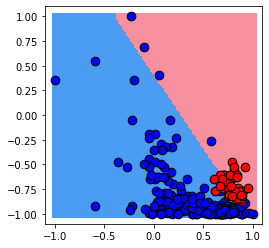

In [345]:
graphBoundary(x_train,y_train,w_log)

In [346]:
error(x_test, y_test, w_log)

0.1849592698802135

In [349]:
yhat = classify(x_test, w_log)
metrics.confusion_matrix(y_test, yhat)

array([[ 9,  4],
       [ 3, 88]], dtype=int64)

## Task 4

### Variable Learning Rate

In [336]:
def VR_logistic_regression(X,Y,w0,T,eta, alpha, beta):
    wt = w0
    e1 = error(X,Y,wt)
    etas = np.empty(T)
    for t in tqdm(range(1,T+1)):
        gt = gradient(X,Y,wt)
        vt = -gt
        wt = wt + eta*vt
        e2 = error(X,Y,wt)
        if e2 < e1:
            eta *= alpha
        elif e2 > e1:
            wt = wt - eta*vt
            eta *= beta
        etas[t-1] = eta
        e1 = e2
    return wt, etas

In [337]:
w0 = np.matrix(np.ones((x_train.shape[1],1)))
w_log_vr, eta = VR_logistic_regression(x_train,y_train, w0,1000,.1, 1.1,.6)

  0%|          | 0/1000 [00:00<?, ?it/s]

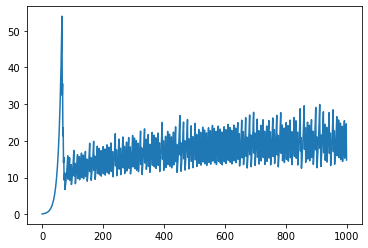

In [338]:
plt.plot(eta)

(10000, 3)


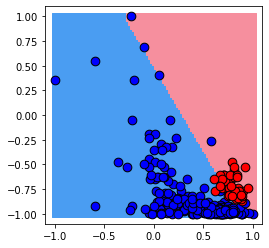

In [347]:
graphBoundary(x_train,y_train,w_log_vr)

In [340]:
error(x_test, y_test, w_log_vr)

0.13636402352585766

In [348]:
yhat = classify(x_test, w_log_vr)
metrics.confusion_matrix(y_test, yhat)

array([[10,  3],
       [ 5, 86]], dtype=int64)

Using variable learning rate gradient descent allows our model to become more precise without sacrificing run time. We achieved a better error meassure with 1/5 of the epochs.

### Transforming the data

In [229]:
def transform(X):
    x0 = X[:,0]
    x1 = X[:,1]
    x2 = X[:,2]
    x1x1 = np.multiply(x1,x1)
    x2x2 = np.multiply(x2,x2)
    x1x2 = np.multiply(x1,x2)

    return np.concatenate([x0,x1,x2,x1x1,x2x2,x1x2], axis=1)

In [355]:
x_train_phi = transform(x_train)
x_test_phi = transform(x_test)

In [356]:
w0 = np.matrix(np.zeros((x_train_phi.shape[1],1)))
w_log_phi = logistic_regression(x_train_phi, y_train, w0, 5000, .1)

  0%|          | 0/5000 [00:00<?, ?it/s]

(10000, 3)


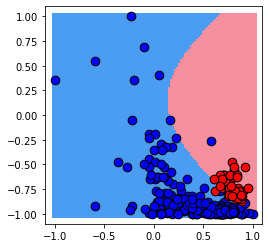

In [357]:
graphBoundary(x_train, y_train, w_log_phi, phi=transform)

In [358]:
error(x_test_phi, y_test, w_log_phi )

0.09773194431270138

In [353]:
yhat = classify(transform(x_test), w_log_phi)
metrics.confusion_matrix(y_test, yhat)

array([[10,  3],
       [ 1, 90]], dtype=int64)

Using a data transform can be useful for logistic regression if the target function isnt perfectly linear as is the case here. Our transformation from 2 dimensions to 5 dimensions greatly increased our results.